In [2]:
import warnings
warnings.filterwarnings("ignore")

import random
import helpers
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from scipy.misc import imread
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS

mpl.style.use('ggplot')
limit = 1000
infosize = 12

title = 'Most frequent words'
chartinfo = 'Author: Mahmoud El-Haj'
footer = 'The {} most frequent words, excluding English stopwords.\n{}'.format(limit, chartinfo)
font = 'font/Ubuntu-B.ttf'
fontcolor='#fafafa'
bgcolor = '#000000'
english_stopwords = set(stopwords.words('english')) | STOPWORDS | ENGLISH_STOP_WORDS


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Reading a the 2019 CCC talks, which is stored as a CSV file
File2019_df = pd.read_csv("csvs/2019.csv", delimiter='|', header=0)#notice the delimiter is not a comma, check your files first.
print('Number of titles: {:,}\n'.format(File2019_df.shape[0]))
File2019_df.sample(5)

Number of titles: 160



,year,congress,title,abstract,link,tags
98,2019,36C3,Human Rights at a Global Crossroads: Underesti...,An update on the circumstances of Mr Snowden a...,https://events.ccc.de/congress/2019/Fahrplan/s...,empty
39,2019,36C3,Tales of old: untethering iOS 11: An open sour...,This talk is about running unsigned code at bo...,https://events.ccc.de/congress/2019/Fahrplan/s...,empty
18,2019,36C3,"Uncover, Understand, Own - Regaining Control O...",The AMD Platform Security Processor (PSP) is a...,https://events.ccc.de/congress/2019/Fahrplan/s...,empty
141,2019,36C3,HAL - The Open-Source Hardware Analyzer: Intro...,Since the Snowden revelations the fear of stea...,https://events.ccc.de/congress/2019/Fahrplan/s...,empty
110,2019,36C3,Der netzpolitische Jahresrückblick: Früher war...,"IT-Sicherheitsgesetz 2.0, Staatstrojaner für d...",https://events.ccc.de/congress/2019/Fahrplan/s...,empty


In [8]:
#reading abstracts 

abstract_dict = {}

# classify that the article has recommends
for i in range(len(File2019_df)):
    if File2019_df["abstract"][i] in abstract_dict.keys():
        abstract_dict[File2019_df["abstract"][i]] += 1
    else:
        abstract_dict.setdefault(File2019_df["abstract"][i], 1)

abstract_dict = [x for x in abstract_dict if str(x) != 'nan']#some talks have no abstracts

In [9]:
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

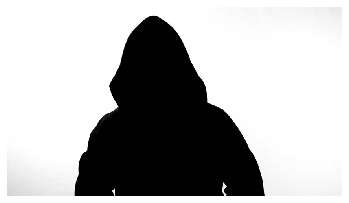

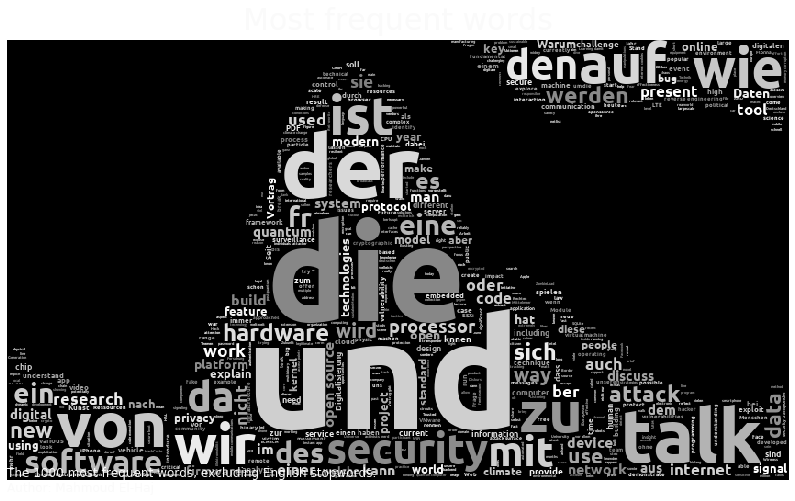

In [11]:
import warnings
warnings.filterwarnings("ignore")

from PIL import Image

mask = np.array(Image.open(r'img\1.jpg'))
plt.imshow(mask)
plt.axis("off")

#abstracts text
import re
abstract_text = " ".join(x for x in abstract_dict)

abstract_text = re.sub('[^a-zA-Z -\']+', '', abstract_text)
abstract_text = abstract_text.replace('>', ' ').replace('<', ' ')
abstract_text = re.sub(' +', ' ', abstract_text)


wordcloud = WordCloud(
    max_words=limit,
    stopwords=english_stopwords,
    mask=imread('img/1.jpg'),
    background_color=bgcolor,
    font_path=font
).generate(abstract_text)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))
plt.title(title, color=fontcolor, size=30, y=1.01)
plt.annotate(footer, xy=(0, -.025), xycoords='axes fraction', fontsize=infosize, color=fontcolor)
plt.axis('off')
plt.show()


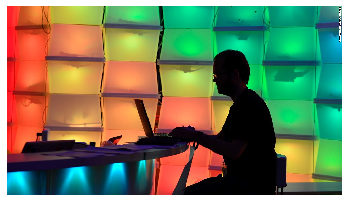

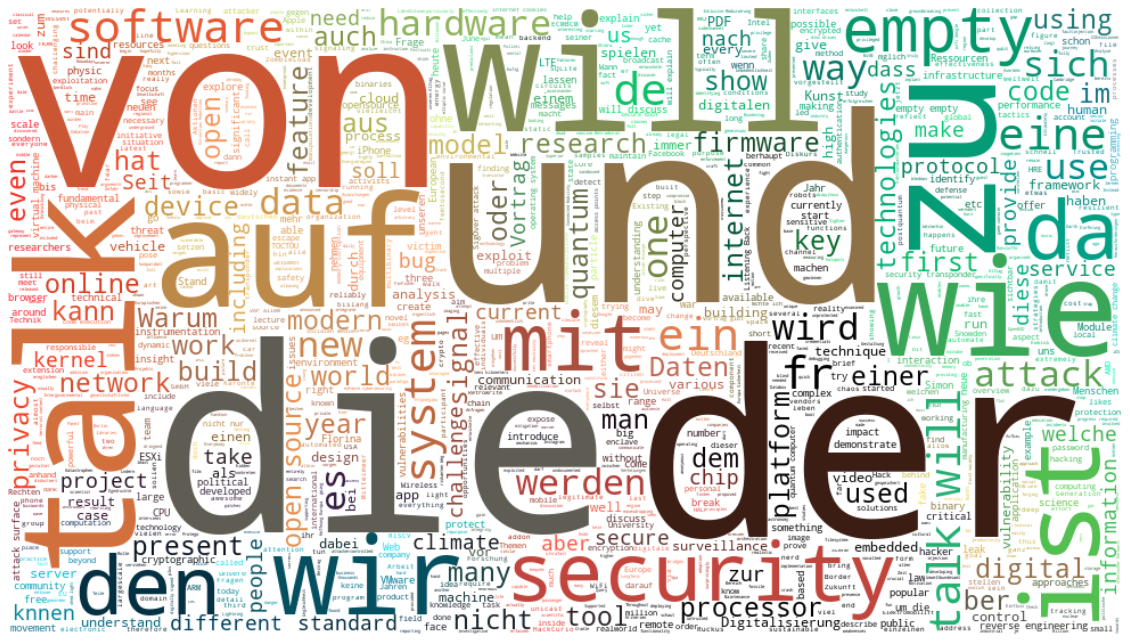

In [12]:
#--------------------------------------------------------------------------------------
#setting mask image

from PIL import Image

mask = np.array(Image.open(r'img\4.jpg'))
plt.imshow(mask)
plt.axis("off")

# lower max_font_size, change the maximum number of word and lighten the background:
from wordcloud import ImageColorGenerator

#--------------------------------------------------------------------------------------

#creating wordcloud
wordcloud = WordCloud(mask=mask, width=2000, height=1000,contour_color="black", max_words=10000,relative_scaling = 0, background_color = "white").generate(abstract_text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()

In [24]:
#abstract most frequent text

import spacy
from collections import Counter
nlp = spacy.load("en")
doc = nlp(abstract_text)
#remove stopwords and punctuations
#words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
nouns = [token.text for token in doc if token.is_stop != True and len(token)>4 and token.is_punct != True and token.pos_ == "NOUN"]
#verbs = [token.text for token in doc if token.is_stop != True and token.is_punct != True and token.pos_ == "VERB"]


# five most common noun tokens
noun_freq = Counter(nouns)
common_nouns = noun_freq.most_common(500)
print (common_nouns)


#word_freq = Counter(words)
#common_words = word_freq.most_common(20)
#print (common_words)

# five most common verbs tokens
#verb_freq = Counter(verbs)
#common_verbs = verb_freq.most_common(5000)
#print (common_verbs)




[('security', 33), ('software', 19), ('hardware', 18), ('attack', 17), ('system', 17), ('research', 14), ('einer', 14), ('attacks', 13), ('nicht', 13), ('climate', 12), ('internet', 12), ('firmware', 11), ('systems', 11), ('technologies', 10), ('devices', 10), ('privacy', 9), ('processor', 9), ('people', 9), ('world', 9), ('kernel', 9), ('source', 9), ('computer', 9), ('machine', 8), ('information', 8), ('analysis', 8), ('tools', 7), ('vulnerability', 7), ('processors', 7), ('years', 7), ('surveillance', 7), ('signal', 7), ('transponder', 7), ('communication', 6), ('process', 6), ('digitalen', 6), ('range', 6), ('cloud', 6), ('network', 6), ('services', 6), ('number', 6), ('engineering', 6), ('techniques', 6), ('features', 6), ('framework', 6), ('instrumentation', 6), ('scale', 5), ('community', 5), ('researchers', 5), ('memory', 5), ('haben', 5), ('vulnerabilities', 5), ('threat', 5), ('access', 5), ('performance', 5), ('durch', 5), ('server', 5), ('protocol', 5), ('results', 5), ('is

In [25]:
allNouns= ( x[0] for x in common_nouns )
allNounsText = ' '.join(str(e) for e in allNouns)
print(allNounsText)

security software hardware attack system research einer attacks nicht climate internet firmware systems technologies devices privacy processor people world kernel source computer machine information analysis tools vulnerability processors years surveillance signal transponder communication process digitalen range cloud network services number engineering techniques features framework instrumentation scale community researchers memory haben vulnerabilities threat access performance durch server protocol results issues video messages surface projects resources vehicles approaches mchte insights operating realworld safety activists movement state victim networks overview binaries infrastructure machines programming humans execution science model physics project example standards authentication protocols challenges design order company equipment quantum defense today encryption exploits device exploitation stellen tactics technology situation months platform teams darauf setzen macht heute

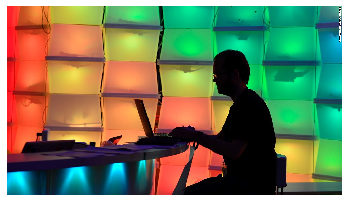

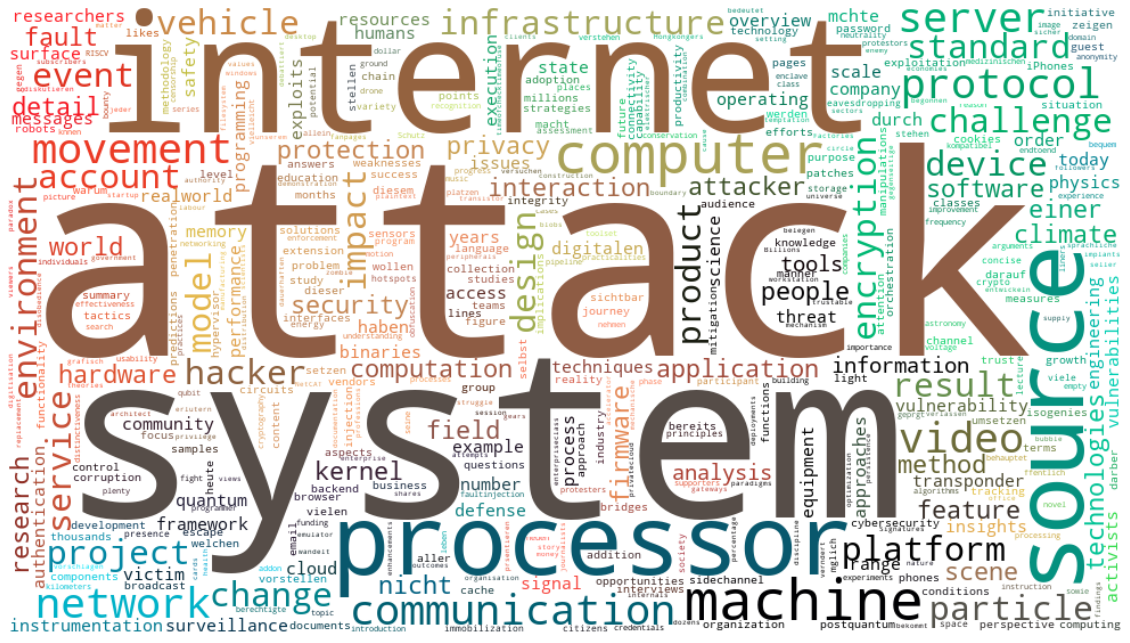

In [26]:
#--------------------------------------------------------------------------------------
#setting mask image

from PIL import Image

mask = np.array(Image.open(r'img\4.jpg'))
plt.imshow(mask)
plt.axis("off")

# lower max_font_size, change the maximum number of word and lighten the background:
from wordcloud import ImageColorGenerator

#--------------------------------------------------------------------------------------

#creating wordcloud
wordcloud = WordCloud(mask=mask, width=2000, height=1000,contour_color="black", max_words=10000,relative_scaling = 0, background_color = "white").generate(allNounsText)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()